In [12]:

import sys
import pickle
sys.path.append("../tools/")
import matplotlib.pyplot

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data


In [13]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary','bonus','long_term_incentive','loan_advances'] # You will need to use more features



In [14]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [15]:
# Exploring the data set 
''' Let us explore the dataset to be more clear on how many data 
points do we have, also the amount of features and where we might want to apply 
cleaning of outliers''' 
# Total Number of points
print("Total number of points:{}".format(len(data_dict)))
# Exploring the data_dict 
for item in data_dict:
    number_features = len(data_dict[item])
    print("Number of features:{}".format(number_features))
    break
# Get features with missing values
missing_values_features = {}
for item in data_dict:
    for feature in data_dict[item]:
        if data_dict[item][feature] == 'NaN':
            if missing_values_features.get(feature) is None:
                missing_values_features[feature] = 1
            else: 
                missing_values_features[feature] += 1

print("List of missing values by feature: {}".format(missing_values_features))

Total number of points:146
Number of features:21
List of missing values by feature: {'salary': 51, 'to_messages': 60, 'deferral_payments': 107, 'total_payments': 21, 'long_term_incentive': 80, 'loan_advances': 142, 'bonus': 64, 'restricted_stock': 36, 'restricted_stock_deferred': 128, 'total_stock_value': 20, 'shared_receipt_with_poi': 60, 'from_poi_to_this_person': 60, 'exercised_stock_options': 44, 'from_messages': 60, 'other': 53, 'from_this_person_to_poi': 60, 'deferred_income': 97, 'expenses': 51, 'email_address': 35, 'director_fees': 129}


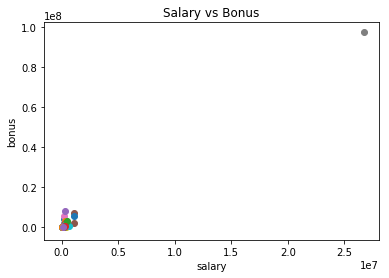

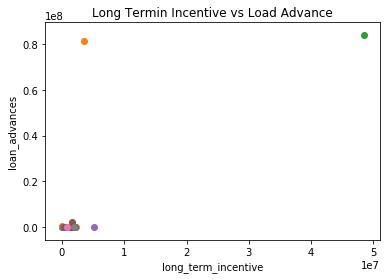

******** Possible Outliers and POIs ( Salary & Bonus ) **********
LAY KENNETH L 7000000 1072321
SKILLING JEFFREY K 5600000 1111258
TOTAL 97343619 26704229
******** End Possible Outliers and POIs **********
******** Possible Outliers and POIs - ( Long Term Incentive & loan Advance) **********
LAY KENNETH L 3600000 81525000
TOTAL 48521928 83925000
FREVERT MARK A 1617011 2000000
******** End Possible Outliers and POIs - ( Long Term Incentive & loan Advance) **********


{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [16]:
### Task 2: Remove outliers
### For checking outliers we will take some features from the initial selected features
### and we will evaluate through matplotlib 
#data outliers selection 
outliers_salary = ['salary', 'bonus']
outliers_incentives_loan = ['long_term_incentive', 'loan_advances']

def print_outliers(features):
    data = featureFormat(data_dict, features, sort_keys = True)
    for point in data:
        salary = point[0]
        bonus = point[1]
        matplotlib.pyplot.scatter( salary, bonus )
print_outliers(outliers_salary)
matplotlib.pyplot.title("Salary vs Bonus")
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()
print_outliers(outliers_incentives_loan)
matplotlib.pyplot.title("Long Termin Incentive vs Load Advance")
matplotlib.pyplot.xlabel("long_term_incentive")
matplotlib.pyplot.ylabel("loan_advances")
matplotlib.pyplot.show()

print("******** Possible Outliers and POIs ( Salary & Bonus ) **********")
for key, value in data_dict.items():
    if value['bonus'] == 'NaN' or value['salary'] == 'NaN':
        continue
    
    if value['bonus'] >= 5000000 and value['salary'] >= 1000000:
        print key, value['bonus'], value['salary']
print("******** End Possible Outliers and POIs **********") 

print("******** Possible Outliers and POIs - ( Long Term Incentive & loan Advance) **********")
for key, value in data_dict.items():
    if value['long_term_incentive'] == 'NaN' or value['loan_advances'] == 'NaN':
        continue
    
    if value['long_term_incentive'] >= 1000000  and value['loan_advances'] >= 1000000:
        print key, value['long_term_incentive'], value['loan_advances']
print("******** End Possible Outliers and POIs - ( Long Term Incentive & loan Advance) **********")

# REMOVING THE OUTLIER
data_dict.pop( "TOTAL") 


In [48]:
import os
from poi_email_addresses import poiEmails
EMAILS="./emails_by_address/"

POI_EMAILS = poiEmails()

### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

def process_emails():
    for root, dirs, files in os.walk(EMAILS):  
        for filename in files:
            print process_email(filename)

def process_email(email):
    # get the email without the domain
    from_to_email = email.split("@")[0]
    # build full path to file to explore 
    file_path = "{}{}".format(EMAILS,email)
    
    if from_to_email.startswith( 'from_' ):
        sender = from_to_email.split('from_')[1] 
        print "Sender:{}".format(sender)
    elif from_to_email.startswith('to_'):
        receiver = from_to_email.split('to_')[1]
        print "Receiver:{}".format(receiver)
    
    for poi in POI_EMAILS:
        
        if recipient not in data_dict:
            data_dict[recipient] = {"from_poi_to_this_person":0}
        # add to count
        if from_poi:
                data_dict[recipient]["from_poi_to_this_person"] += 1    
    
def poi_deleted_count(is_sender, filename):
    deleted = 0
    with open(filename, 'r') as f:
    for line in f:
        arr = line.rsplit("/",3)[1:]
        subject, folder = arr[0],arr[1]
        print subject, folder
    
    return deleted
       

process_emails()            

Sender:outlook.team
arnold-j all_documents
None
Receiver:melba.bowen
beck-s _sent_mail
None
Sender:john.greene
shackleton-s all_documents
None
Receiver:michael.ratner
enron_power 24_hour
None
Sender:john.keiser
corman-s deleted_items
None
Receiver:mark.pickering
arnold-j deleted_items
None
Sender:randy.pais
cash-m inbox
None
Receiver:teruo.tanaka
haedicke-m all_documents
None
Sender:julie.gomez
hendrickson-s all_documents
None
Sender:sdleonard
crandell-s inbox
None
Receiver:soblander
arnold-j _sent_mail
None
Receiver:shannon.mcpearson
bass-e inbox
None
Sender:larry.pavlou
watson-k inbox
None
Receiver:willie.harrell
arnold-j all_documents
None
Sender:paul.finken
jones-t all_documents
None
Sender:mary.johnson
farmer-d all_documents
None
Sender:ron.coker
dasovich-j all_documents
None
Sender:rex.shelby
jones-t all_documents
None
Receiver:elizabeth.shim
arnold-j all_documents
None
Receiver:bjorn.hagelmann
arnold-j deleted_items
None
Receiver:kedson
dasovich-j ab_1890_group
None
Receiver:bla

farmer-d all_documents
None
Sender:sandi.braband
farmer-d all_documents
None
Sender:stacey.bolton
dasovich-j all_documents
None
Receiver:tom.swank
badeer-r all_documents
None
Sender:cynthia.harkness
jones-t all_documents
None
Receiver:shonnie.daniel
allen-p deleted_items
None
Receiver:neil.bresnan
inbox saved_mail
None
Receiver:r..shepperd
allen-p deleted_items
None
Sender:jhawker
dorland-c inbox
None
Sender:susan.wadle
inbox junk_file
None
Sender:geoff.storey
hodge-j all_documents
None
Receiver:larry.lawyer
allen-p deleted_items
None
Receiver:audrey.o'neil
farmer-d all_documents
None
Receiver:s..theriot
allen-p deleted_items
None
Receiver:don.baughman
allen-p deleted_items
None
Receiver:gene.humphrey
beck-s all_documents
None
Sender:andrea.richards
arnold-j all_documents
None
Receiver:laurel.bolt
allen-p deleted_items
None
Receiver:john.kiani
allen-p all_documents
None
Sender:navigator
transport columbia_gas_gulf
None
Sender:andy.rodriquez
enron_power 24_hour
None
Sender:john.zurita
b

beck-s all_documents
None
Sender:molly.magee
beck-s all_documents
None
Receiver:kathy.mcmahon
enron_power 24_hour
None
Sender:e..haedicke
haedicke-m calendar
None
Receiver:shari.stack
badeer-r all_documents
None
Receiver:sandi.braband
bailey-s all_documents
None
Sender:gordon.mckillop
buy-r inbox
None
Receiver:barry.pearce
arnold-j deleted_items
None
Receiver:linda.lawrence
dasovich-j all_documents
None
Sender:mark.mcconnell
donoho-l deleted_items
None
Sender:jcjcal02
dasovich-j all_documents
None
Sender:sharon.butcher
cash-m deleted_items
None
Sender:kim.theriot
beck-s all_documents
None
Receiver:patrice.mims
arnold-j all_documents
None
Receiver:sarah.palmer
arnold-j inbox
None
Receiver:john.greene
arnold-j deleted_items
None
Sender:soblander
arnold-j all_documents
None
Receiver:fred.boas
beck-s _sent_mail
None
Sender:chris.booth
mann-k all_documents
None
Sender:tamara.black
baughman-d all_documents
None
Sender:nytasha.sims
mims-thurston-p deleted_items
None
Sender:chaundra.woods
grif

None
Sender:carla.galvan
kean-s all_documents
None
Sender:dan.masters
donohoe-t inbox
None
Sender:derek.davies
haedicke-m inbox
None
Sender:eric.gonzales
farmer-d all_documents
None
Sender:joyce.dorsey
haedicke-m all_documents
None
Receiver:arnie.bailey
campbell-l all_documents
None
Sender:beth.jenkins
benson-r deleted_items
None
Receiver:p..o'neil
badeer-r deleted_items
None
Receiver:lauren.urquhart
enron_power 24_hour
None
Receiver:bob.crane
arnold-j deleted_items
None
Receiver:guillermo.canovas
arnold-j inbox
None
Receiver:laurie.knight
arnold-j inbox
None
Sender:ron.nolte
bass-e all_documents
None
Sender:karen.o'day
germany-c all_documents
None
Receiver:darran.binns
arnold-j inbox
None
Receiver:infopost
townsend-j deleted_items
None
Sender:lippmanc
donoho-l deleted_items
None
Sender:mary.franklin
germany-c all_documents
None
Sender:elizabeth.shim
grigsby-m deleted_items
None
Sender:colleen.koenig
arnold-j 2000_conference
None
Receiver:frank.hayden
allen-p _sent_mail
None
Receiver:b

allen-p _sent_mail
None
Sender:elizabeth.soto
beck-s inbox
None
Sender:trey.cash
cash-m all_documents
None
Receiver:jackie.young
bass-e all_documents
None
Receiver:leslie.reeves
allen-p deleted_items
None
Sender:molly.harris
beck-s inbox
None
Sender:richard.shapiro
allen-p all_documents
None
Sender:jimboman
lokay-m all_documents
None
Sender:s..theriot
beck-s inbox
None
Sender:lesli.campbell
hyatt-k enron_kids
None
Receiver:m..scott
allen-p deleted_items
None
Receiver:stephen.schwarz
beck-s _sent_mail
None
Sender:kenny.soignet
arnold-j all_documents
None
Receiver:darren.vanek
arnold-j deleted_items
None
Sender:terry.west
geaccone-t cfp
None
Sender:alejandra.chavez
brawner-s deleted_items
None
Receiver:smith.day
badeer-r all_documents
None
Receiver:w..cantrell
allen-p deleted_items
None
Receiver:peter.keavey
arnold-j _sent_mail
None
Sender:mike.jordan
beck-s all_documents
None
Receiver:ekrogh
hain-m _sent_mail
None
Receiver:richard.shapiro
allen-p _sent_mail
None
Sender:aneela.charania
j

None
Receiver:bobbie.power
beck-s _sent_mail
None
Receiver:darlene.forsyth
davis-d all_documents
None
Sender:fred.boas
farmer-d all_documents
None
Receiver:tomskilljr
skilling-j all_documents
None
Receiver:chris.sonneborn
arnold-j deleted_items
None
Sender:joe.casas
germany-c all_documents
None
Receiver:clickathome
bass-e _sent_mail
None
Sender:ganapathy.ramesh
keiser-k deleted_items
None
Sender:dan.junek
germany-c all_documents
None
Sender:jonathan.whitehead
arnold-j inbox
None
Sender:margie.nguyen
griffith-j all_documents
None
Receiver:cooper.richey
allen-p _sent_mail
None
Receiver:david.roensch
campbell-l _sent_mail
None
Sender:regina.perkins
farmer-d all_documents
None
Receiver:thomas.gros
beck-s _sent_mail
None
Receiver:rick.buy
allen-p deleted_items
None
Sender:don.black
bass-e all_documents
None
Sender:hollis.kimbrough
fischer-m all_documents
None
Sender:bruno.gaillard
badeer-r all_documents
None
Receiver:jeffrey.miller
allen-p deleted_items
None
Receiver:randall.gay
allen-p _se

blair-l deleted_items
None
Receiver:jennifer.blay
allen-p deleted_items
None
Receiver:davila1
farmer-d all_documents
None
Receiver:timothy.blanchard
bass-e _sent_mail
None
Sender:kelly.johnson
buy-r inbox
None
Receiver:henry.means
beck-s all_documents
None
Sender:carla.hoffman
badeer-r all_documents
None
Receiver:chris.walker
arnold-j deleted_items
None
Sender:craig.buehler
inbox archives
None
Sender:victor.browner
dasovich-j all_documents
None
Sender:michael.neves
beck-s all_documents
None
Sender:sandra.mccubbin
dasovich-j all_documents
None
Receiver:marilyn.colbert
arnold-j all_documents
None
Receiver:sshackl
shackleton-s all_documents
None
Receiver:eric.moon
allen-p deleted_items
None
Receiver:alma.green
blair-l deleted_items
None
Sender:mark.taylor
haedicke-m all_documents
None
Sender:monique.sanchez
bass-e inbox
None
Receiver:chad.landry
allen-p _sent_mail
None
Sender:bonnie.white
gilbertsmith-d all_documents
None
Sender:suzanne.vann
hayslett-r inbox
None
Sender:charlie.graham
bla

delainey-d _sent_mail
None
Sender:timothy.ray
dasovich-j all_documents
None
Receiver:howard.fromer
arnold-j inbox
None
Sender:dennis.alters
donoho-l inbox
None
Sender:kelli.little
griffith-j all_documents
None
Sender:cutty.cunningham
horton-s all_documents
None
Sender:chrisrtowest
crandell-s deleted_items
None
Receiver:steven.leppard
kaminski-v _sent_mail
None
Receiver:richard.sage
beck-s _sent_mail
None
Sender:rbw
dasovich-j all_documents
None
Receiver:chris.booth
arora-h deleted_items
None
Sender:cassi.wallace
beck-s deleted_items
None
Sender:m..schmidt
arnold-j deleted_items
None
Receiver:richard.hanagriff
baughman-d all_documents
None
Sender:joe.stepenovitch
baughman-d all_documents
None
Sender:f..herod
bass-e inbox
None
Receiver:dan.dietrich
arnold-j deleted_items
None
Receiver:leslie.lawner
allen-p all_documents
None
Receiver:julia.white
corman-s all_documents
None
Sender:glen.hass
blair-l deleted_items
None
Receiver:kay.mann
bailey-s all_documents
None
Sender:corry.bentley
baugh

dasovich-j all_documents
None
Receiver:becky.spencer
bailey-s all_documents
None
Receiver:robert.cotten
bass-e all_documents
None
Sender:stouchstone
brawner-s all_documents
None
Sender:robert.hemstock
dasovich-j all_documents
None
Receiver:lhayman
taylor-m all_documents
None
Sender:billy.braddock
arora-h deleted_items
None
Receiver:tom.barkley
dean-c deleted_items
None
Receiver:loretta.brelsford
enron_power 24_hour
None
Sender:marie.heard
bailey-s deleted_items
None
Sender:d..steffes
archives old_messages
None
Sender:mark.whitt
allen-p all_documents
None
Sender:dhunter
dasovich-j all_documents
None
Sender:rusty.stevens
mann-k all_documents
None
Sender:kim.melodick
arora-h deleted_items
None
Receiver:amitava.dhar
arnold-j deleted_items
None
Receiver:brad.jones
bass-e deleted_items
None
Receiver:joseph.deffner
allen-p all_documents
None
Receiver:michael.bridges
arora-h all_documents
None
Receiver:russ.porter
hain-m all_documents
None
Receiver:gregory.schockling
allen-p deleted_items
None

farmer-d all_documents
None
Sender:james.new
beck-s all_documents
None
Receiver:dave.kellermeyer
allen-p all_documents
None
Receiver:m..love
arnold-j deleted_items
None
Receiver:lori.pinder
derrick-j deleted_items
None
Sender:jeannie.mandelker
dasovich-j all_documents
None
Receiver:julie
kaminski-v _sent_mail
None
Receiver:kelly.loocke
arnold-j inbox
None
Receiver:sherlyn.schumack
beck-s _sent_mail
None
Receiver:jeffrey.soo
buy-r all_documents
None
Receiver:trey.cash
beck-s all_documents
None
Receiver:vance.taylor
beck-s all_documents
None
Receiver:jordan.mintz
beck-s _sent_mail
None
Sender:michael.mattox
arora-h deleted_items
None
Sender:louis.soldano
campbell-l all_documents
None
Receiver:sheila.tweed
bailey-s all_documents
None
Receiver:john.pavetto
arora-h all_documents
None
Receiver:chris.gaffney
bailey-s deleted_items
None
Sender:john.ballentine
hayslett-r all_documents
None
Receiver:mark.evans
beck-s all_documents
None
Sender:cindy.derecskey
dasovich-j all_documents
None
Receive

In [ ]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)